In [31]:
import numpy as np
import scipy as sp
from scipy import special as sp
import matplotlib.pyplot as plt

# Gaussian processes

Mainly the ideas expressed in the tutorial: https://www.youtube.com/watch?v=4vGiHC35j9s&t=422s

Gaussian processes can be used for a variety of things. This Notebook will provide an overview of Gaussian Processes. We start with the basics of Gaussian functions. Gaussian processes are defined by covarieneces. Some important definitions follow:

1. The covariance

\begin{align}
cov( \mathbf x, \mathbf y) = \sum_i { (x_i - \mu_x)(y_i - \mu_y) } = \mathbb E ( \mathbf x \mathbf y )
\end{align}

2. The coorrelation coefficient

\begin{align}
\rho( \mathbf x, \mathbf y) = \frac { cov( \mathbf x, \mathbf y ) } { \sqrt{ cov( \mathbf x, \mathbf x ) cov( \mathbf y, \mathbf y ) }}
\end{align}


3. The dot product represents similarity between vectors: $\mathbf x \cdot \mathbf y$ = `x @ y.T`

4. $\mathcal N ( 0, 1 ) $ Gaussians are very useful because they can be shifted and scaled to any place.

5. Gaussian vectors can be sampled from Gaussians:

\begin{align}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} &=
\mathcal N \Big({
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\begin{bmatrix}
1                   & \mathbb E (x_1x_2) \\ 
\mathbb E (x_2x_1)  & 1
\end{bmatrix}}\big)                                \\
&= \mathcal N \Big({
\begin{bmatrix}
0 \\ 
0
\end{bmatrix},
\mathbf \Sigma
}\big) 
\end{align}


Thus evevrything about Gaussian processes revolves around the covariance matrix $\mathbf \Sigma$

## Samppling form a distribution

Sampling can be performed by sampling from a uniform distribution, and then projecting it throough the CDF of the Gaussian function in the reverse order. This can be later shifted and scaled as necessary with $\sigma$ and $\mu$

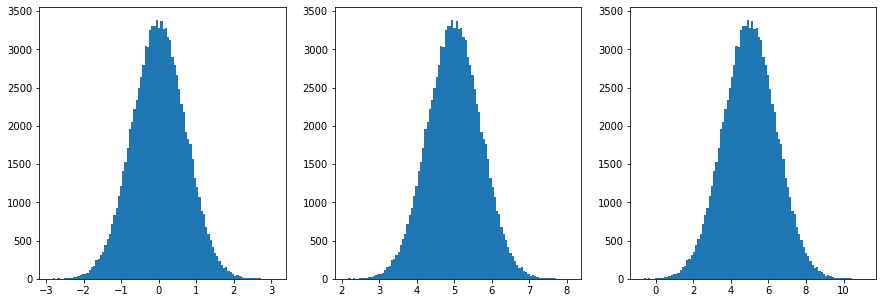

In [43]:
dist = sp.erfinv((np.random.rand(100000)-0.5)*2)

plt.figure(figsize=(15,5))
plt.subplot(131)
_ = plt.hist(dist, bins=100)
plt.subplot(132)
_ = plt.hist(dist+5, bins=100)
plt.subplot(133)
_ = plt.hist(dist*2 + 5, bins=100)
plt.show()
plt.close()